In [1]:
import pandas as pd
import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import logging
import sys
import os
import numpy as np

from joblib import load  # To load the saved model


In [2]:

sys.path.append(os.path.abspath("../"))


from scripts.model import prepare_data, split_data

from src import data_loading as dl
from scripts.logger import logger 
from scripts.Model_Explainability import load_model,lime_explainability,global_feature_importance,pdp_ice_plots,plot_roc_auc


2025-02-11 13:39:03,282 - INFO - Directory already exists: c:\Users\HP\Documents\Dagii\week 8 --9\fraud-detection-models\logs
2025-02-11 13:39:03,285 - INFO - Directory already exists: c:\Users\HP\Documents\Dagii\week 8 --9\fraud-detection-models\data


2025-02-11 13:39:03,285 - INFO - Directory already exists: c:\Users\HP\Documents\Dagii\week 8 --9\fraud-detection-models\data


In [3]:

credit = dl.load_data("creditcard.csv")
# Remove duplicates
credit = credit.drop_duplicates()
credit["Class"] = credit["Class"].astype(bool)



2025-02-11 13:39:03,345 - INFO - Attempting to load data from: c:\Users\HP\Documents\Dagii\week 8 --9\fraud-detection-models\data\creditcard.csv


2025-02-11 13:39:03,345 - INFO - Attempting to load data from: c:\Users\HP\Documents\Dagii\week 8 --9\fraud-detection-models\data\creditcard.csv


2025-02-11 13:39:07,861 - INFO - Data successfully loaded from: c:\Users\HP\Documents\Dagii\week 8 --9\fraud-detection-models\data\creditcard.csv


2025-02-11 13:39:07,861 - INFO - Data successfully loaded from: c:\Users\HP\Documents\Dagii\week 8 --9\fraud-detection-models\data\creditcard.csv


In [4]:


# to match the number of instances in the minority class.

# Randomly shuffle the entire dataset to ensure randomness
df = credit.sample(frac=1, random_state=42).reset_index(drop=True)

# Isolate the minority class (fraud) with 473 instances
minority_class = df.loc[df['Class'] == 1]

# Select a random subset of the majority class (non-fraud) with the same number of instances as the minority class
majority_class_subset = df.loc[df['Class'] == 0].sample(n=473, random_state=42)

# Combine the minority class and the majority class subset to create a balanced dataset
balanced_df = pd.concat([minority_class, majority_class_subset])

# Shuffle the balanced dataset to ensure randomness
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the first few rows of the balanced dataset
balanced_df.head()
X_credit, y_credit = prepare_data(balanced_df, 'Class')

2025-02-11 13:39:09,770 - INFO - Preparing data by separating features and target column: Class


2025-02-11 13:39:09,770 - INFO - Preparing data by separating features and target column: Class


In [5]:

X_credit, y_credit = prepare_data(balanced_df, 'Class')

2025-02-11 13:39:09,784 - INFO - Preparing data by separating features and target column: Class


2025-02-11 13:39:09,784 - INFO - Preparing data by separating features and target column: Class


In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Convert the target variable to integer
credit['Class'] = credit['Class'].astype(int)

# Define the resampling strategies
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.1)

# Split data into features (X) and target (y)
X = credit.iloc[:, :-1].values  # Assuming 'Class' is the last column
y = credit['Class'].values

# Apply under-sampling first
X_under, y_under = under.fit_resample(X, y)

# Apply over-sampling on the under-sampled data
X_resampled, y_resampled = over.fit_resample(X_under, y_under)

# Now you can use the resampled data for further processing
print(Counter(y_resampled))


Counter({np.int64(0): 4730, np.int64(1): 2365})


In [7]:
#  Train-Test Split
X_train, X_test, y_train, y_test = split_data(X_resampled, y_resampled, test_size=0.2, random_state=42)


2025-02-11 13:39:10,623 - INFO - Splitting data into train and test sets


2025-02-11 13:39:10,623 - INFO - Splitting data into train and test sets


2025-02-11 13:39:10,722 - INFO - Model loaded successfully from ../models/randomforestfor_credit_card_data.pkl


2025-02-11 13:39:10,722 - INFO - Model loaded successfully from ../models/randomforestfor_credit_card_data.pkl


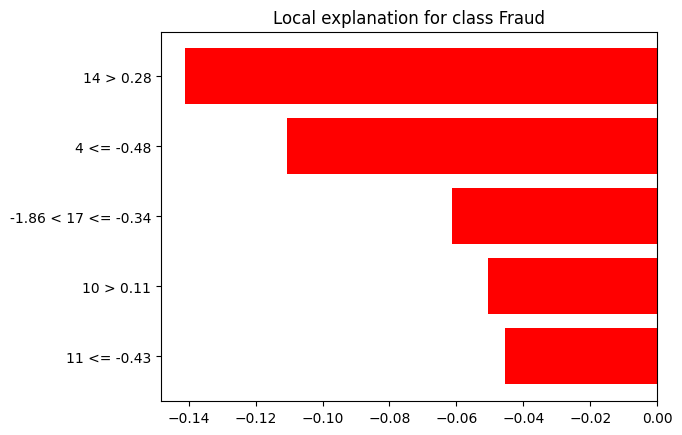

2025-02-11 13:39:12,014 - INFO - LIME explanation generated successfully.


2025-02-11 13:39:12,014 - INFO - LIME explanation generated successfully.


In [8]:
# Set the path to your saved model (replace with the actual path)
#model_path = '../models/randomforestfor_credit_card_data.pkl'
model_path = '../models/randomforestfor_credit_card_data.pkl'  # Replace with your model path
model = load_model(model_path) 
lime_explainability(model, X_train, X_test)


2025-02-11 13:39:12,146 - ERROR - Error in plotting global feature importance: 'numpy.ndarray' object has no attribute 'columns'


2025-02-11 13:39:12,146 - ERROR - Error in plotting global feature importance: 'numpy.ndarray' object has no attribute 'columns'
Error in plotting global feature importance: 'numpy.ndarray' object has no attribute 'columns'


2025-02-11 13:39:28,001 - ERROR - Error in generating PDP and ICE plots: 'numpy.ndarray' object has no attribute 'columns'


2025-02-11 13:39:28,001 - ERROR - Error in generating PDP and ICE plots: 'numpy.ndarray' object has no attribute 'columns'
Error in generating PDP and ICE plots: 'numpy.ndarray' object has no attribute 'columns'


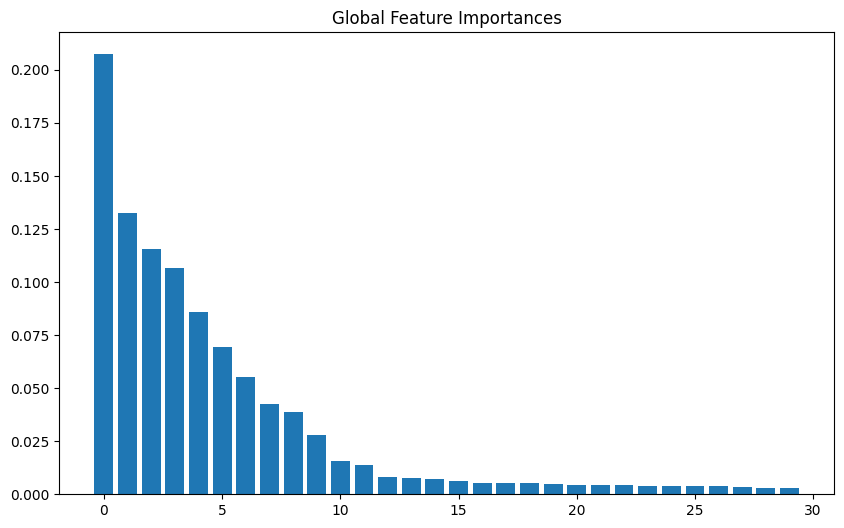

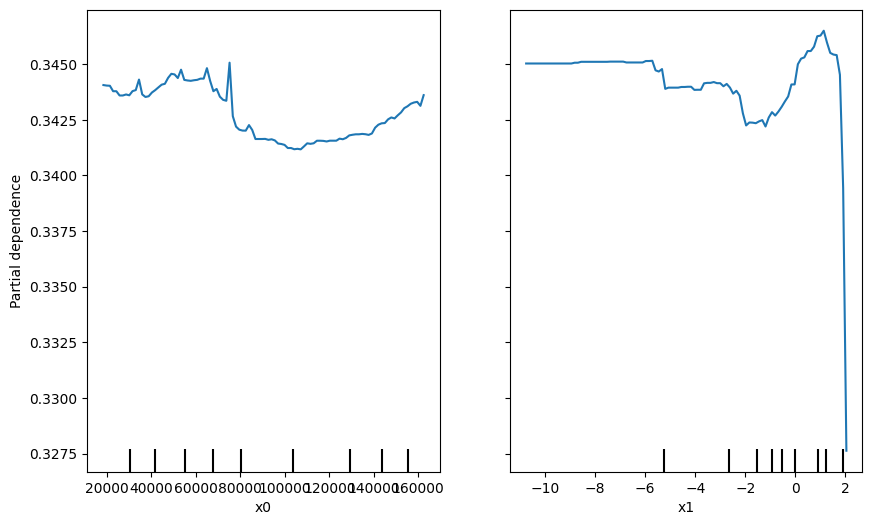

In [9]:
global_feature_importance(model, X_train)  # Plot global feature importance
pdp_ice_plots(model, X_train, [0, 1])  # Plot PDP and ICE for specified features

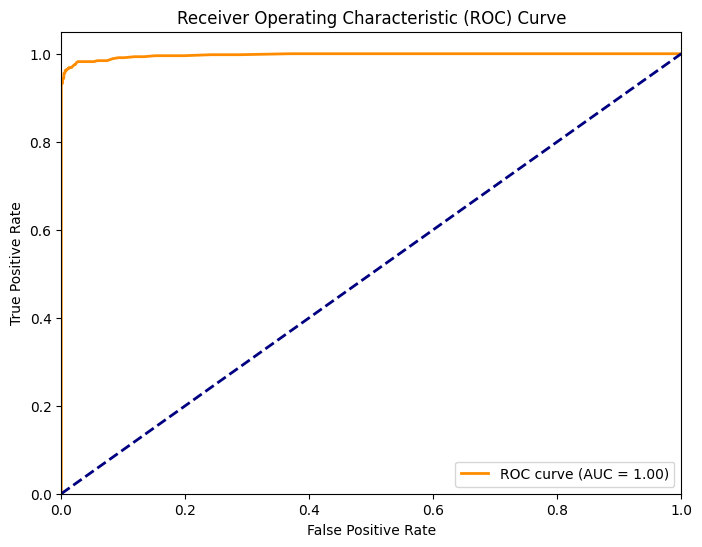

2025-02-11 13:39:47,180 - INFO - ROC Curve plotted successfully with AUC = 1.00.


2025-02-11 13:39:47,180 - INFO - ROC Curve plotted successfully with AUC = 1.00.


In [11]:
plot_roc_auc(model, X_test, y_test)